# Import Libraries and Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [6]:
# from google.colab import files

# uploaded = files.upload()a

In [7]:
filepath = '/content'
train_data = pd.read_csv(os.path.join(filepath,'train.csv'))
test_data = pd.read_csv(os.path.join(filepath,'test_set.csv'))

In [8]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [9]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


# Data Cleaning

In [10]:
print(train_data.Y.value_counts())

0    2376
1    1534
Name: Y, dtype: int64


In [11]:
class_weights = len(train_data[train_data.Y == 0])/len(train_data[train_data.Y == 1])
print(class_weights)

1.5488917861799218


## Check for Null Values

In [12]:
if train_data.isna().sum().all() == 0:
    print('No Null values')
else:
  print('There are Null values')

No Null values


In [13]:
if test_data.isna().sum().all() == 0:
    print('No Null values')
else:
  print('There are Null values')

No Null values


## Check for outliers

In [14]:
train_data.max(axis=0).values

array([3.9090e+03, 4.3400e+00, 1.4280e+01, 4.5400e+00, 4.2810e+01,
       9.0900e+00, 3.5700e+00, 7.2700e+00, 1.1110e+01, 3.2300e+00,
       1.8180e+01, 2.6100e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00,
       4.4100e+00, 2.0000e+01, 7.1400e+00, 7.6900e+00, 1.8750e+01,
       6.3200e+00, 1.1110e+01, 1.7100e+01, 5.4500e+00, 1.2500e+01,
       2.0830e+01, 1.6660e+01, 3.3330e+01, 9.0900e+00, 1.4280e+01,
       5.8800e+00, 1.2500e+01, 4.7600e+00, 1.8180e+01, 4.7600e+00,
       2.0000e+01, 7.6900e+00, 5.0500e+00, 8.3300e+00, 1.1110e+01,
       4.7600e+00, 7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01,
       2.1420e+01, 2.2050e+01, 2.1700e+00, 1.0000e+01, 4.3850e+00,
       9.7520e+00, 2.7770e+00, 3.2478e+01, 6.0030e+00, 1.9829e+01,
       1.1025e+03, 9.9890e+03, 1.0062e+04, 1.0000e+00])

In [15]:
train_data.min(axis=0).values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0.])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

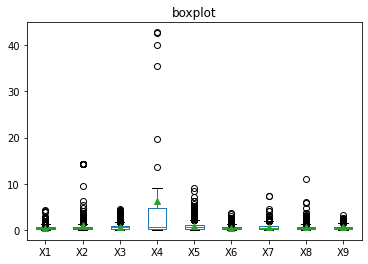

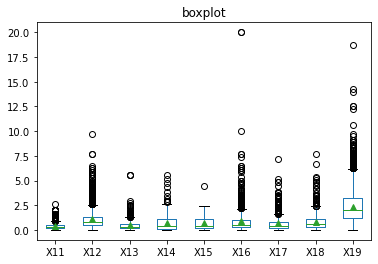

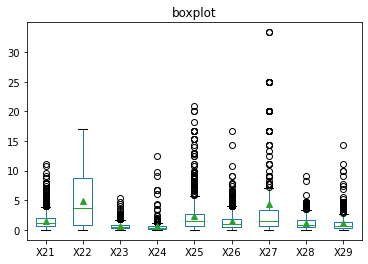

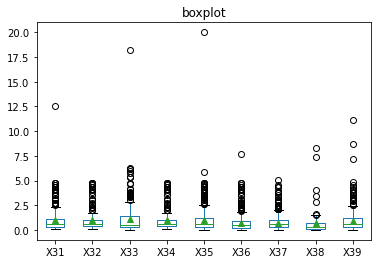

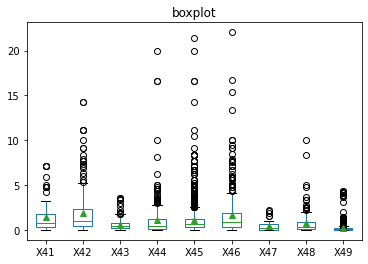

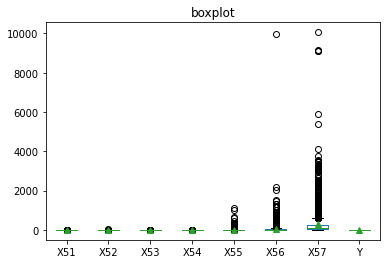

In [16]:
for i in range(1,len(train_data.columns[1:-1]),10):
    train_data[train_data > 0][train_data.columns[i:i+9]].plot(kind='box', title='boxplot', showmeans=True)

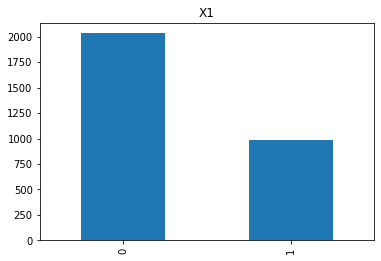

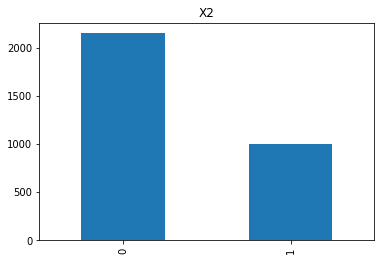

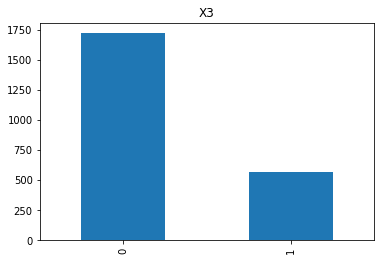

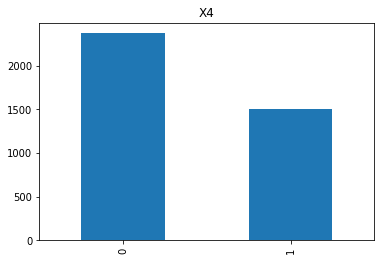

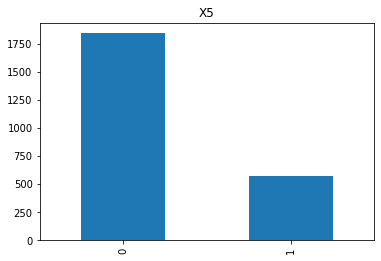

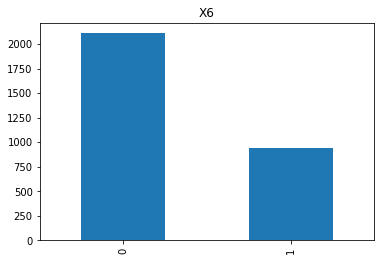

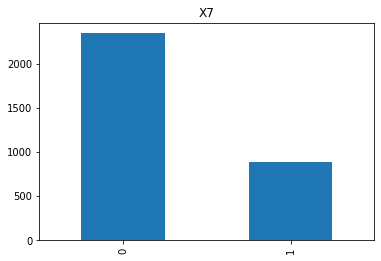

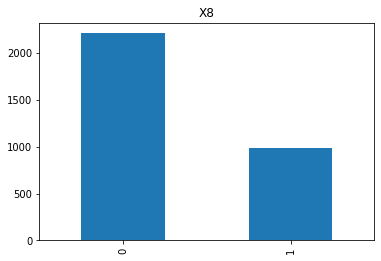

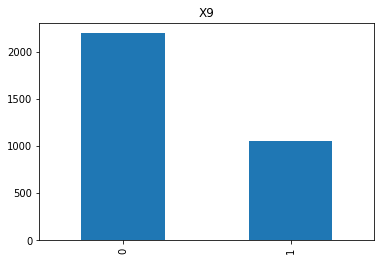

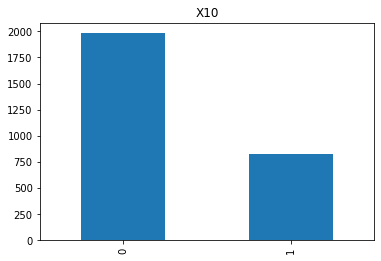

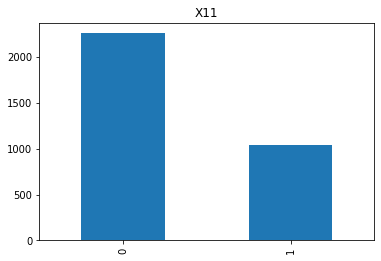

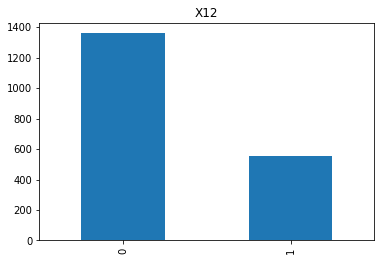

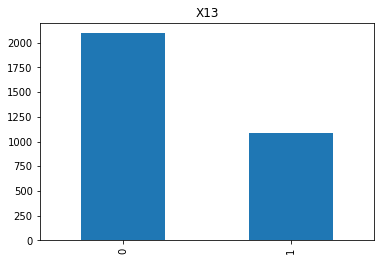

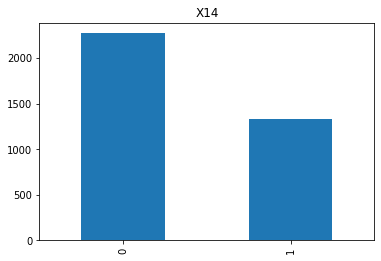

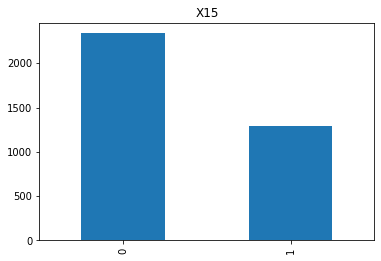

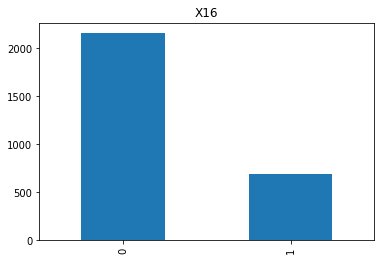

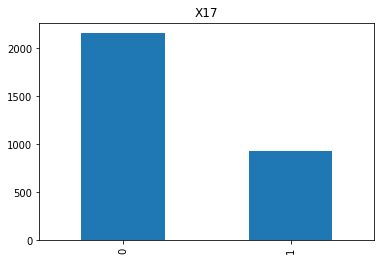

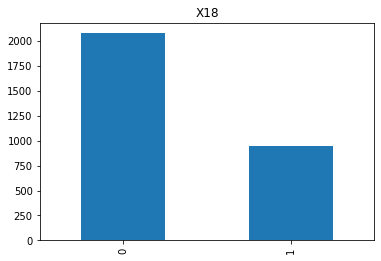

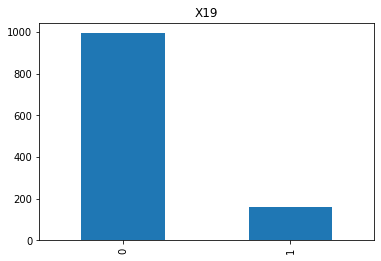

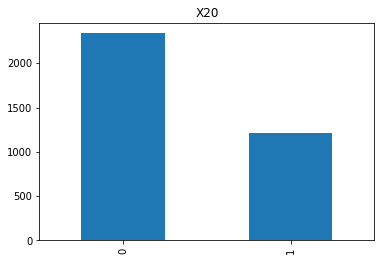

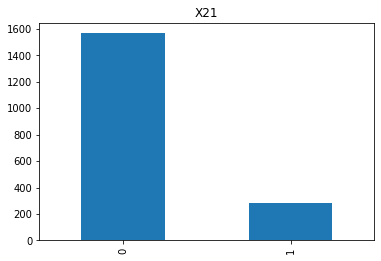

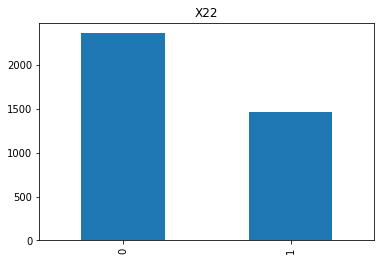

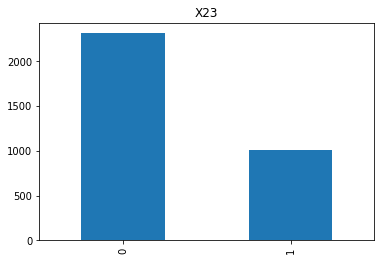

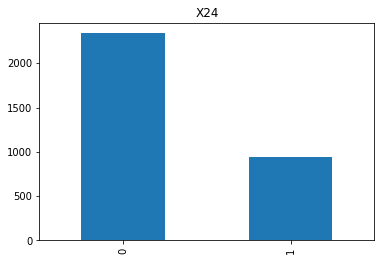

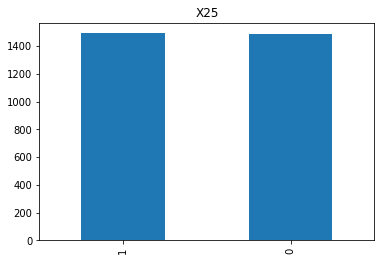

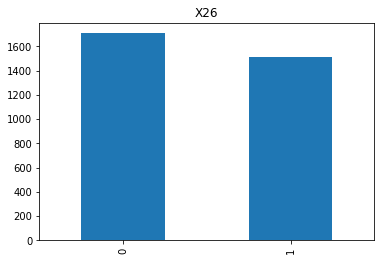

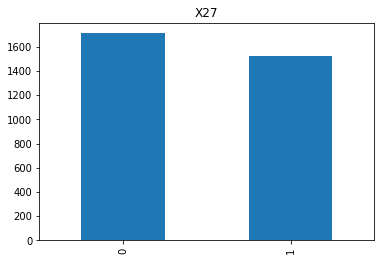

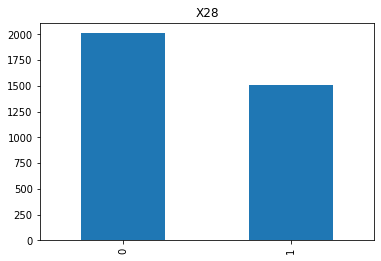

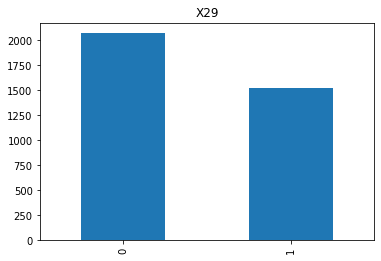

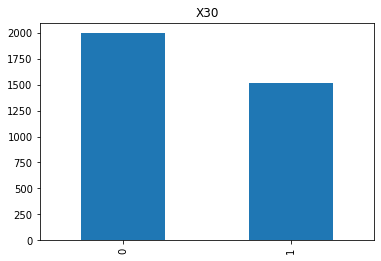

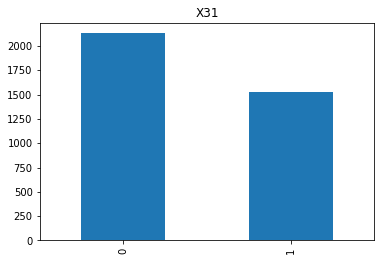

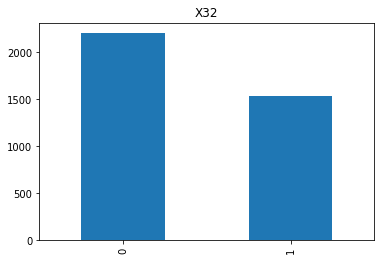

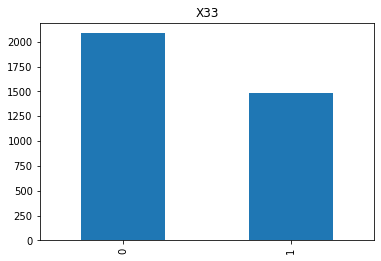

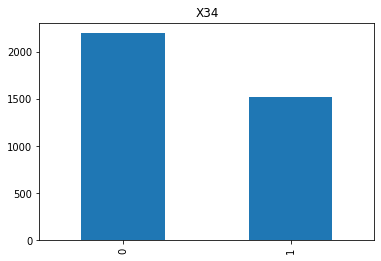

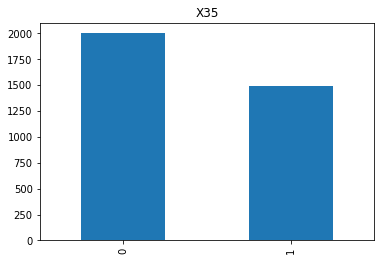

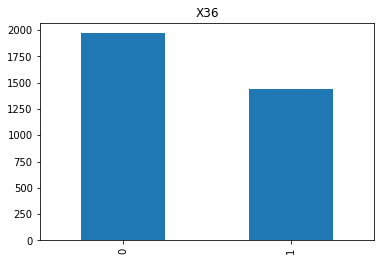

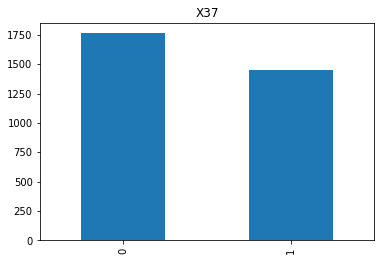

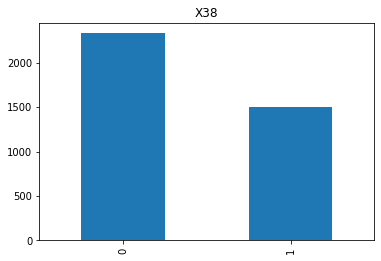

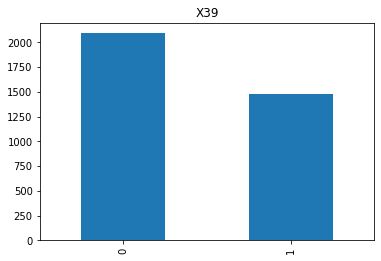

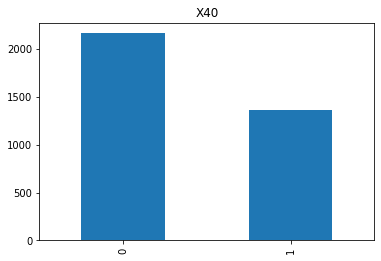

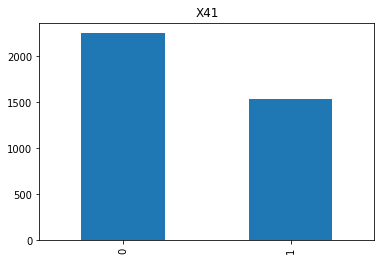

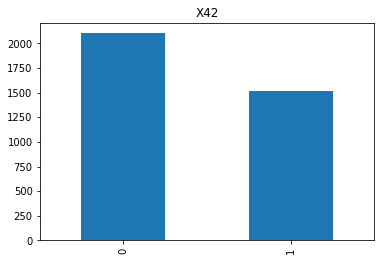

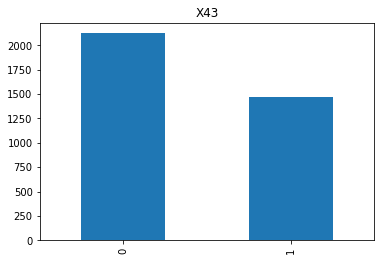

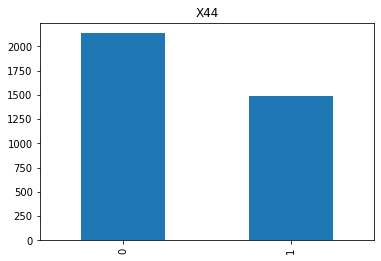

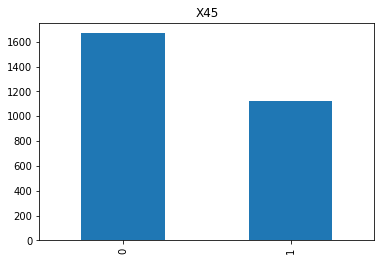

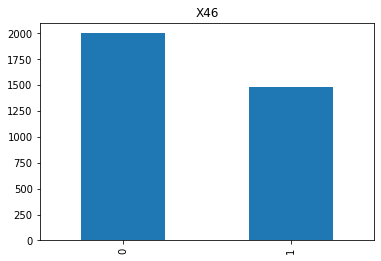

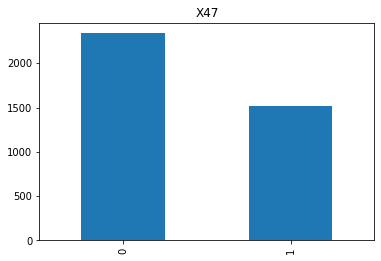

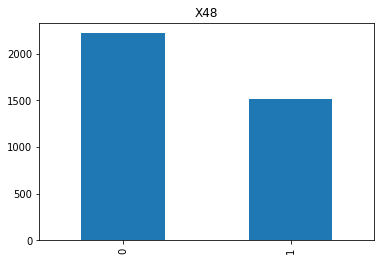

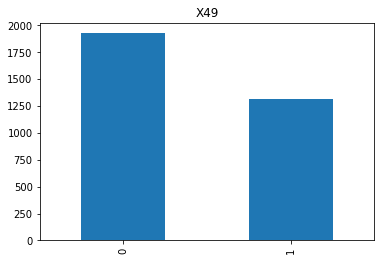

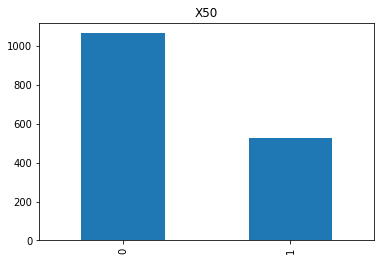

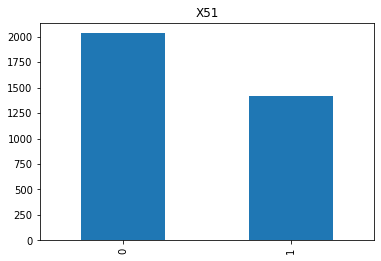

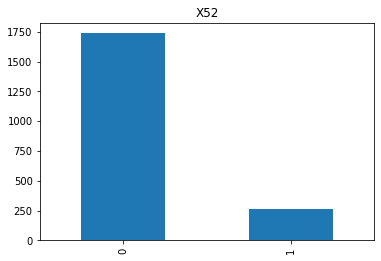

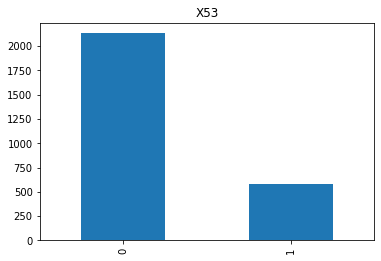

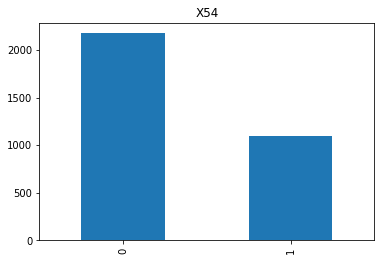

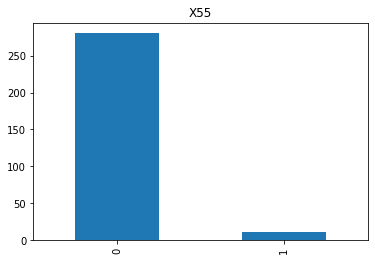

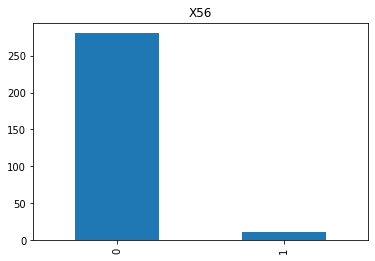

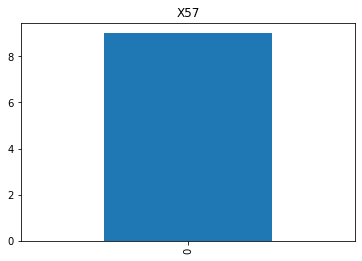

In [17]:
for col in train_data.columns[1:-1]:
    train_data[train_data[col] == train_data[col].min()]["Y"].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [18]:
# train_data.drop(index=train_data[train_data['X57'] == train_data['X57'].min()].index, inplace=True)

In [19]:
train_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.56,0.00,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.70,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.12,0.25,0.00,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [20]:
for col in train_data.columns[1:-1]:
    q3 = 3*(len(train_data[train_data[col] > 0][col])+1)//4
    val = train_data[train_data[col] > 0][col].sort_values().iloc[q3]
    train_data.loc[train_data[col] > val, col] = val
    test_data.loc[test_data[col] > val, col] = val

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

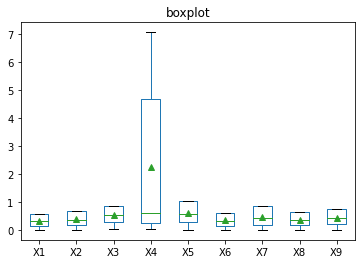

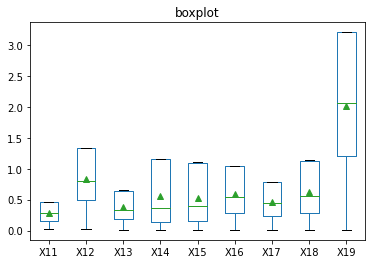

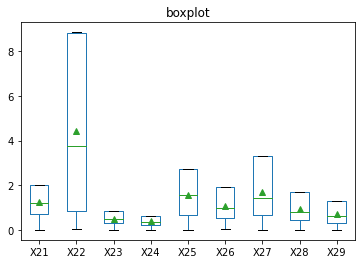

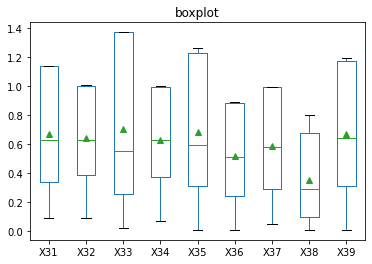

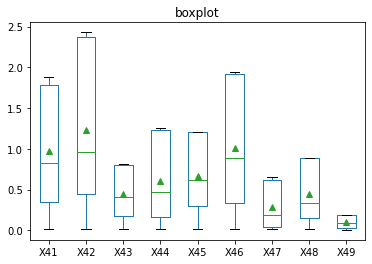

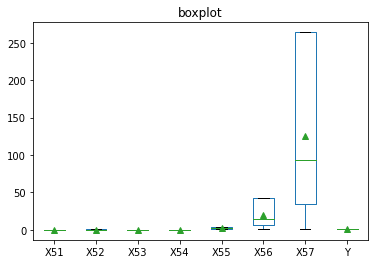

In [21]:
for i in range(1,len(train_data.columns[1:-1]),10):
    train_data[train_data > 0][train_data.columns[i:i+9]].plot(kind='box', title='boxplot', showmeans=True)

# Correlation of variables with the target

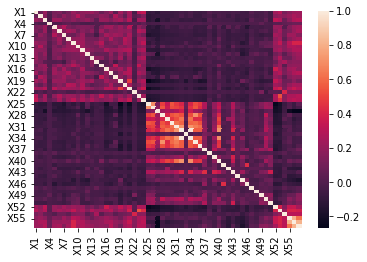

In [22]:
sns.heatmap(train_data[train_data.columns[1:-1]].corr())

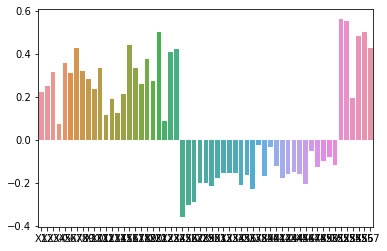

In [23]:
sns.barplot(x=train_data.columns[1:-1],y=train_data[train_data.columns[1:-1]].corrwith(train_data['Y']))

Since columns - X12, X14, X23, X38, X40, X54 are highly correlated and less correlated with the target we can ignore these columns.

In [24]:
train_data.drop(columns=['X12', 'X14', 'X23', 'X38', 'X40', 'X54'],inplace=True)
test_data.drop(columns=['X12', 'X14', 'X23', 'X38', 'X40', 'X54'],inplace=True)

# Dimensionality reduction

In [25]:
ss = StandardScaler()
train_data[train_data.columns[1:-1]] = ss.fit_transform(train_data[train_data.columns[1:-1]])
test_data[test_data.columns[1:]] = ss.fit_transform(test_data[test_data.columns[1:]])

In [26]:
components = 8
pca = PCA(n_components = components)
x_train = pca.fit_transform(train_data[train_data.columns[1:-1]])
y_train = train_data['Y'].values
x_test = pca.transform(test_data[test_data.columns[1:]])

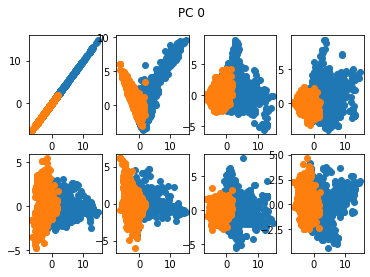

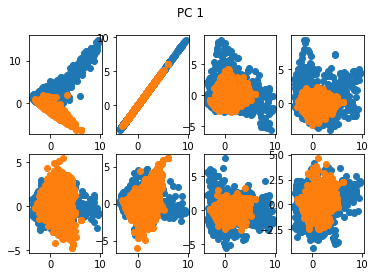

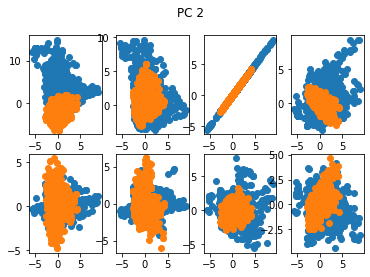

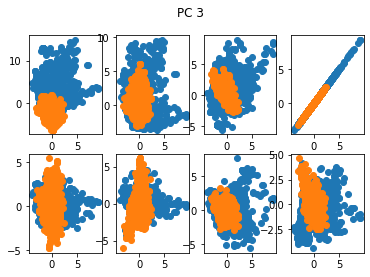

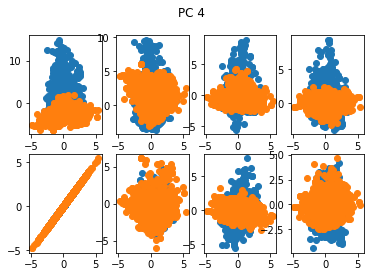

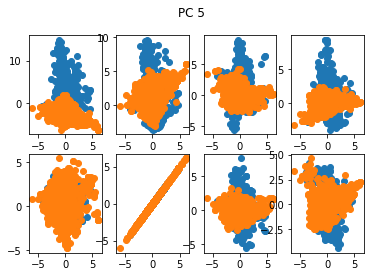

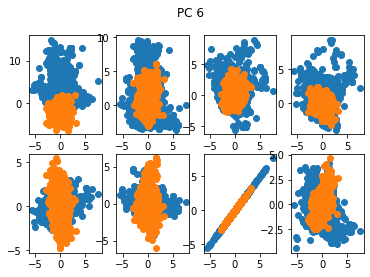

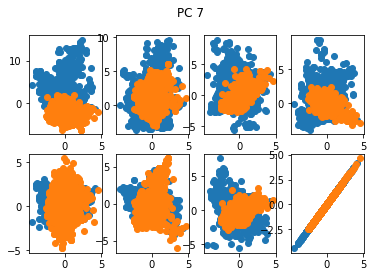

In [27]:
for j in range(components):
    fig, ax = plt.subplots(2,components//2)
    for i in range(components):
        if i <= components//2-1:
            ax[0,i].scatter(x_train[y_train==0][:,j],x_train[y_train==0][:,i])
            ax[0,i].scatter(x_train[y_train==1][:,j],x_train[y_train==1][:,i])
        else:
            ax[1,i-components//2].scatter(x_train[y_train==0][:,j],x_train[y_train==0][:,i])
            ax[1,i-components//2].scatter(x_train[y_train==1][:,j],x_train[y_train==1][:,i])
    fig.suptitle(f'PC {j}')
    plt.show()

# Data Split

In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.25,random_state=42)

In [29]:
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape)

(2932, 8) (2932,) (978, 8) (978,)


# Training

In [30]:
lr = LogisticRegressionCV(cv=5,random_state=45,class_weight='balanced')
lr.fit(X_train,Y_train)
pred_lr = lr.predict(X_val)

In [31]:
svc = SVC(class_weight='balanced',random_state=45)
svc.fit(X_train,Y_train)
pred_svc = svc.predict(X_val)

In [32]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=45)
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_val)

In [33]:
xgb = XGBClassifier(class_weight='balanced',n_estimators=1000,verbosity=0,random_state=45)
xgb.fit(X_train,Y_train,eval_set=[(X_val,Y_val)],eval_metric='auc',early_stopping_rounds=200,verbose=0)
pred_xgb = xgb.predict(X_val)

In [34]:
lgb = LGBMClassifier(class_weight='balanced',random_state=45)
lgb.fit(X_train,Y_train)
pred_lgb = lgb.predict(X_val)

# Validation

## AUC Score of Multi Models over Validation sets

In [35]:
print('Logistic Regression', roc_auc_score(Y_val, pred_lr))
print('Support vecotr classifier', roc_auc_score(Y_val, pred_svc))
print('Random Forest Classifier', roc_auc_score(Y_val, pred_rfc))
print('XGBoost', roc_auc_score(Y_val, pred_xgb))
print('LightGBM', roc_auc_score(Y_val, pred_lgb))

Logistic Regression 0.9145264918148214
Support vecotr classifier 0.9316317549727161
Random Forest Classifier 0.9372249603942968
XGBoost 0.9372381622953705
LightGBM 0.9411855307164232


## F1 Score of Multi Models over Validation sets

In [36]:
print('Logistic Regression', f1_score(Y_val, pred_lr))
print('Support vecotr classifier', f1_score(Y_val, pred_svc))
print('Random Forest Classifier', f1_score(Y_val, pred_rfc))
print('XGBoost', f1_score(Y_val, pred_xgb))
print('LightGBM', f1_score(Y_val, pred_lgb))

Logistic Regression 0.894393741851369
Support vecotr classifier 0.9128205128205129
Random Forest Classifier 0.9261744966442953
XGBoost 0.9226736566186108
LightGBM 0.9268929503916449


## Confusion Matrix over prediction from Validation sets

In [37]:
print('Logistic Regression\n', confusion_matrix(Y_val, pred_lr))
print('Support vecotr classifier\n', confusion_matrix(Y_val, pred_svc))
print('Random Forest Classifier\n', confusion_matrix(Y_val, pred_rfc))
print('XGBoost\n', confusion_matrix(Y_val, pred_xgb))
print('LightGBM\n', confusion_matrix(Y_val, pred_lgb))

Logistic Regression
 [[554  44]
 [ 37 343]]
Support vecotr classifier
 [[554  44]
 [ 24 356]]
Random Forest Classifier
 [[578  20]
 [ 35 345]]
XGBoost
 [[567  31]
 [ 28 352]]
LightGBM
 [[567  31]
 [ 25 355]]


In [38]:
print('Logistic Regression\n', classification_report(Y_val, pred_lr))
print('Support vecotr classifier\n', classification_report(Y_val, pred_svc))
print('Random Forest Classifier\n', classification_report(Y_val, pred_rfc))
print('XGBoost\n', classification_report(Y_val, pred_xgb))
print('LightGBM\n', classification_report(Y_val, pred_lgb))

Logistic Regression
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       598
           1       0.89      0.90      0.89       380

    accuracy                           0.92       978
   macro avg       0.91      0.91      0.91       978
weighted avg       0.92      0.92      0.92       978

Support vecotr classifier
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       598
           1       0.89      0.94      0.91       380

    accuracy                           0.93       978
   macro avg       0.92      0.93      0.93       978
weighted avg       0.93      0.93      0.93       978

Random Forest Classifier
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       598
           1       0.95      0.91      0.93       380

    accuracy                           0.94       978
   macro avg       0.94      0.94      0.94       978


As we can see LIghtGBM turned out to be better than other models. So we will be using Lightgbm for prediction over test data

# Inference

In [42]:
pred = lgb.predict(x_test)
submission = test_data.copy()
submission.drop(columns=submission.columns[1:],inplace=True)
submission['Y'] = pred

In [43]:
submission.to_csv('Submission.csv',index=False)

In [44]:
submission

,Unnamed: 0,Y
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
686,686,0
687,687,0
688,688,0
689,689,0
